# Introduction to Regression with Neural Networks

In [131]:
import tensorflow as tf

print(tf.__version__)

2.4.1


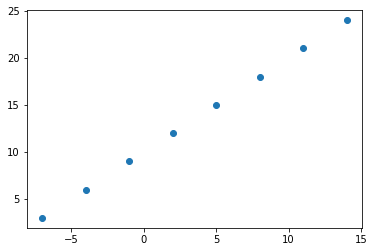

In [132]:
# Creating Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create Labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize
plt.scatter(X, y)

## Input and Output shapes

In [133]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [134]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [135]:
# Convert Numpy Arrays to Tensors
X = tf.constant(X)
y = tf.constant(y)

## Steps in Modeling

In [136]:
# Set Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 777ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [137]:
# Do a prediction with our trained model.
y_pred = model.predict([17.])
y_pred

array([[12.716021]], dtype=float32)

## Improving the model

In [138]:
# 1. Create a model using the Sequential API.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    # tf.keras.layers.Dense(100, activation="relu"),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.mae, # MEA = Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 642ms/step - loss: 14.6466 - mae: 14.6466
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 13.2603 - mae: 13.2603
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5659 - mae: 12.5659
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 11.8675 - mae: 11.8675
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 11.1621 - mae: 11.1621
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4475 - mae: 10.4475
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7214 - mae: 9.7214
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9817 - mae: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2262 - mae: 8.2262
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [139]:
model.predict([17.0])

array([[26.434414]], dtype=float32)

## Evaluating a model

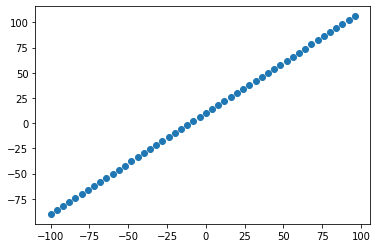

In [140]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make bigger label set
y = X + 10

plt.scatter(X, y);

In [141]:
X_train = X[:40] # 80 Percent of data
X_test = X[40:] # The last 20 percent of data

y_train = y[:40]
y_test = y[40:]

## Visualizing the data

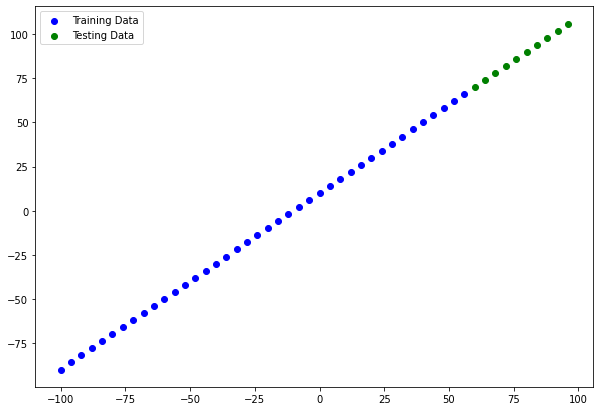

In [142]:
plt.figure(figsize=(10, 7))

# Training Data = blue, Testing Data = Green
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")

# Show Legend
plt.legend();

In [143]:
# 1. Creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compiling the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

## Visualizing the model

In [144]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [145]:
# 3. Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [156]:
y_prediction = model.predict(X_test)

y_prediction

array([[56.562923],
       [60.246662],
       [63.9304  ],
       [67.61414 ],
       [71.297874],
       [74.98161 ],
       [78.66535 ],
       [82.34908 ],
       [86.03282 ],
       [89.71656 ]], dtype=float32)

In [163]:
# Plotting Function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_prediction):
    # Set Figure Size.
    plt.figure(figsize=(10, 7))

    # Set axis for Training data.
    plt.scatter(train_data, train_labels, c="b", label="Training Data")

    # Set axis for Testing data.
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")

    # Set axis of the predictions.
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    # Show Legend on generated plot.
    plt.legend();

In [164]:
    plot_predictions()

<ipython-input-163-0e940447678d>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 7))


RecursionError: maximum recursion depth exceeded while calling a Python object